In [1]:
from QPCA.decomposition.Qpca import QPCA
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, transpile, execute,assemble
from qiskit.visualization import plot_bloch_multivector,plot_histogram,array_to_latex
import matplotlib.pyplot as plt
from QPCA.quantumUtilities.Tomography import StateVectorTomography
import random
from qiskit.extensions import UnitaryGate
from QPCA.preprocessingUtilities.preprocessing import generate_matrix
from QPCA.quantumUtilities.quantum_utilities import thetas_computation,from_binary_tree_to_qcircuit

# General use case of tomography 

Here we show that our tomography implementation can be used in general to estimate any quantum circuit' statevectors.

In [2]:
qc=QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(1)

qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘

In [3]:
aer=Aer.get_backend('statevector_simulator')
statevector=aer.run(transpile(qc,aer)).result().get_statevector()
array_to_latex(statevector)

/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


<IPython.core.display.Latex object>

In [4]:
StateVectorTomography.state_vector_tomography(qc,n_shots=8000,n_repetitions=1)

{'00': 0.49383701764853555,
 '01': -0.5024937810560445,
 '10': 0.50386009963084,
 '11': -0.4997499374687305}

We can specify the qubits that you want to reconstruct (or measure) and if drawing the circuit that implements the tomography

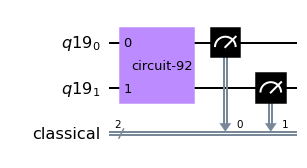

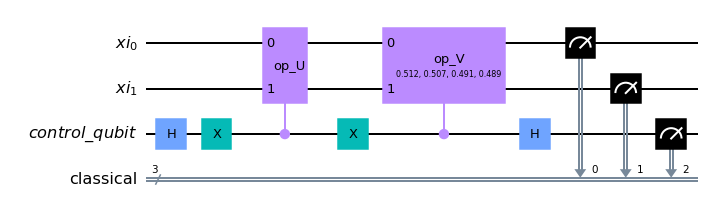

{'00': 0.5119814449762804,
 '01': -0.5069516742254631,
 '10': 0.4914264950122246,
 '11': -0.48925964476952316}

In [5]:
StateVectorTomography.state_vector_tomography(qc,n_shots=8000,n_repetitions=1,drawing_amplitude_circuit=True,drawing_sign_circuit=True)

# Qpca class usability

In [2]:
resolution=8
matrix_dimension=4
lista=list(range(0,2**resolution))
#eigenvalues_list=[0.65,0.25,0.06,0.04]


In [3]:
#4747
seed=900
input_matrix=generate_matrix(matrix_dimension=matrix_dimension,replicate_paper=False,seed=seed)#,eigenvalues_list=eigenvalues_list)

Matrix:
 [[0.6  0.48 0.62 0.42]
 [0.48 0.54 0.43 0.44]
 [0.62 0.43 1.03 0.5 ]
 [0.42 0.44 0.5  0.45]]

eigenvalue: 0.027247404850062114 - eigenvector: [ 0.412 -0.648 -0.272  0.58 ]
eigenvalue: 0.10008154552014045 - eigenvector: [ 0.75  -0.047 -0.13  -0.647]
eigenvalue: 0.34856039638600744 - eigenvector: [ 0.142  0.628 -0.719  0.264]
eigenvalue: 2.152199520475261 - eigenvector: [0.498 0.429 0.627 0.419]


In [4]:
qpca=QPCA().fit(input_matrix,resolution=resolution)

In [5]:
np.linalg.eig(qpca.input_matrix),qpca.input_matrix

((array([0.8189219 , 0.13262885, 0.03808149, 0.01036776]),
  array([[ 0.49767392,  0.14173162,  0.74992357,  0.41212554],
         [ 0.42879739,  0.62775433, -0.04712204, -0.64794816],
         [ 0.62656256, -0.71859259, -0.13048335, -0.27206277],
         [ 0.41937194,  0.26355521, -0.64681393,  0.57991169]])),
 array([[0.22867167, 0.18244503, 0.23696264, 0.15987783],
        [0.18244503, 0.20727599, 0.16225141, 0.16647126],
        [0.23696264, 0.16225141, 0.39139492, 0.19164203],
        [0.15987783, 0.16647126, 0.19164203, 0.17265743]]))

/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


[0.4728715 0.085235  0.006611  0.002074 ]
[0.4728715 0.085235 ]


(array([0.8203125, 0.1328125]),
 array([[ 0.48646311,  0.16427382],
        [ 0.41483178,  0.70489864],
        [ 0.60950684, -0.78947257],
        [ 0.41015815,  0.29474251]]))

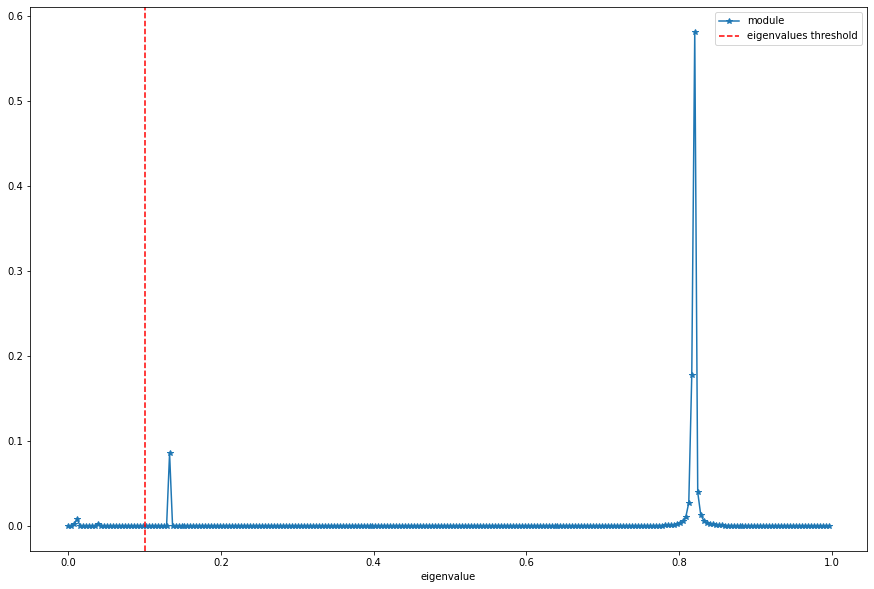

In [7]:
qpca.eigenvectors_reconstruction(n_shots=1000000,n_repetitions=1,plot_peaks=True,eigenvalue_threshold=0.1)

In [15]:
qpca.quantum_input_matrix_reconstruction()

array([[0.58174466, 0.46030112, 0.58215168, 0.40290834],
       [0.46030112, 0.56290443, 0.36262917, 0.4212889 ],
       [0.58215168, 0.36262917, 1.02685202, 0.45641505],
       [0.40290834, 0.4212889 , 0.45641505, 0.44800626]])

In [16]:
qpca.transform(input_matrix=input_matrix)

array([[ 1.04254796,  0.0584915 ,  0.03989419,  0.14216342],
       [ 0.89809689,  0.2456005 ,  0.06746102,  0.05332968],
       [ 1.31297446, -0.27235538,  0.07743111,  0.07284986],
       [ 0.87861703,  0.10488006,  0.02648678, -0.00887352]])

In [8]:
qpca.true_input_matrix,np.linalg.eig(qpca.input_matrix)

(array([[0.22867167, 0.18244503, 0.23696264, 0.15987783],
        [0.18244503, 0.20727599, 0.16225141, 0.16647126],
        [0.23696264, 0.16225141, 0.39139492, 0.19164203],
        [0.15987783, 0.16647126, 0.19164203, 0.17265743]]),
 (array([0.8189219 , 0.13262885, 0.03808149, 0.01036776]),
  array([[ 0.49767392,  0.14173162,  0.74992357,  0.41212554],
         [ 0.42879739,  0.62775433, -0.04712204, -0.64794816],
         [ 0.62656256, -0.71859259, -0.13048335, -0.27206277],
         [ 0.41937194,  0.26355521, -0.64681393,  0.57991169]])))